In [16]:
import matplotlib.pyplot as plt
import pandas as pd 

In [17]:
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

alldf = pd.merge(ridedata, citydata, on="city", how="left")

alldf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


<function matplotlib.pyplot.show(*args, **kw)>

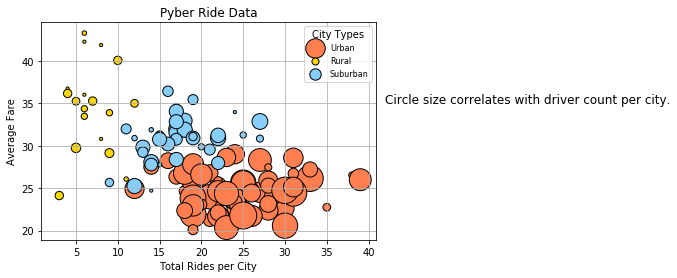

In [22]:
urban_city_type = alldf[alldf["type"] == "Urban"].groupby([alldf["city"]])
rural_city_type = alldf[alldf["type"] == "Rural"].groupby([alldf["city"]])
suburban_city_type = alldf[alldf["type"] == "Suburban"].groupby([alldf["city"]])

x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black")
plt.grid()

plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare")
plt.title("Pyber Ride Data")

legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 


plt.text(42,35,"Circle size correlates with driver count per city.", fontsize = 12)

plt.savefig("data/scatteplot.png", bbox_inches="tight")

plt.show

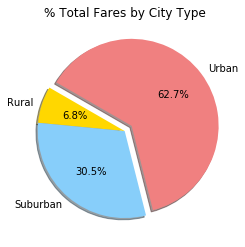

In [19]:
type_grouped = alldf.groupby(['type'])
fare_sum = type_grouped['fare'].sum()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% Total Fares by City Type")

plt.savefig("data/farebytypepie.png")
plt.show()


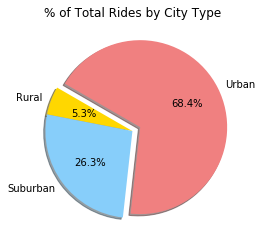

In [20]:
rides_count = type_grouped['ride_id'].count()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.savefig("data/ridesbytypepie.png")
plt.show()

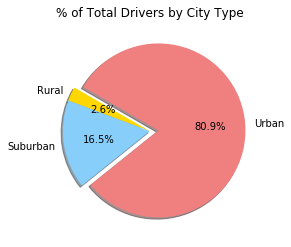

In [21]:
type_groupeddrivers = citydata.groupby(['type'])
drivers_sum = type_groupeddrivers['driver_count'].sum()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.savefig("data/driversbytypepie.png")

plt.show()